#**Initial Implementation - Team Dash Trackers**
###Team members: Simran Kaur,  Sofia Luong, Xinchen Li, Abigail Chen
GitHub Repo: [Github - UCLA-Data-Sci-25](https://github.com/abigailyc/UCLA-Data-Sci-25)
---

1. We chose the [DoorDash ETA Prediction](https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction/data) dataset for our project.

2. Our response variable is *‘total_seconds.*’ We created this new column by subtracting the *‘created_at*’ feature from the *‘actual_delivery_time*’ feature. This represents the total time in seconds a DoorDash order takes from when it was ordered to when it was delivered. We are studying this to see what variables impact the time it takes for a delivery to be completed. At the moment, these are the main predictors we have chosen based on the greedy algorithm we coded:
	- ‘estimated_store_to_consumer_driving_duration’
	- ‘total_outstanding_orders’
	- ‘total_onshift_dashers’
	- ‘subtotal’
	- ‘hour_of_day’

	We are still researching which predictors will enhance our model further, if any.


3. a) The data cleaning and preprocessing we did consisted of dropping irrelavent featuress and dropping the rows with samples that had NaN values in them. We also did feature engineering by creating a new feature (our target variable) which calculates the total seconds it took for a delivery to be completed. We also introduced two new features: 'hour_of_day' and 'weekday' based on the 'created_at' feature. Finally, we removed outliers and normalized our data.

	b) We plotted the correlation matrix to see correlations between possible predictors and the target variable. We also implemented a forwards greedy algorithm to select the optimal features (unique to each model type) to use to predict the total_seconds feature. Finally, we plotted scatter plots to see relationships between predictors and response variables that may not have been evident through the other methods described above.

	c) We implemented a linear regression model to predict our response variable using training and testing datasets. We also tried using neural networks to predict our response variable.

	d) For classification, we used decision trees and logistic regression models. However, we realized that the logistic regression model is not appropriate because our response variable is not categorical.

4. GitHub Repo: [Github - UCLA-Data-Sci-25](https://github.com/abigailyc/UCLA-Data-Sci-25)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/historical_data.csv.zip')
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


##**Data Cleaning**

Removing unnecessary columns, removing rows with missing data, feature engineering, etc.

In [ ]:
#creating target variable 'total_seconds'
data_cleaned = data.copy()
created_at = pd.to_datetime(data_cleaned['created_at'])
actual_delivery_time = pd.to_datetime(data_cleaned['actual_delivery_time'])

data_cleaned['hour_of_day'] = created_at.dt.hour
data_cleaned['weekday'] = actual_delivery_time.dt.weekday

data_cleaned['total_seconds'] = (actual_delivery_time - created_at).dt.total_seconds()
data_cleaned = data_cleaned[data_cleaned['total_seconds']>0]

data_cleaned2 = data_cleaned.drop(["actual_delivery_time", "created_at"], axis=1)

data_cleaned3 = data_cleaned2.drop(['store_id', 'order_protocol', 'min_item_price', 'max_item_price',
                                'total_busy_dashers', 'estimated_order_place_duration', 'store_primary_category'], axis=1)

data_cleaned3 = data_cleaned3.dropna(subset=['total_onshift_dashers','estimated_store_to_consumer_driving_duration', 'market_id'])

##**Removing Outliers**

Used the IQR method to calculate outliers and remove the rows with those outliers

In [ ]:
Q1 = data_cleaned3['total_seconds'].quantile(0.25)
Q3 = data_cleaned3['total_seconds'].quantile(0.75)
IQR = Q3 - Q1
in_range = (data_cleaned3['total_seconds'] >= Q1 - 1.5 * IQR) & (data_cleaned3['total_seconds'] <= Q3 + 1.5 * IQR)

data_no_outliers = data_cleaned3[in_range]

##**Normalizing the Data**

In [ ]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_no_outliers), columns=data_no_outliers.columns)

##**Separating Training and Testing Data**

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(scaled_data.drop(['total_seconds'], axis=1), scaled_data['total_seconds'], test_size=0.2, random_state=42)

##**EDA Techniques - Correlation Matrix**

In [ ]:
correlation_matrix = data_cleaned2.corr(numeric_only = True)
correlation_matrix['total_seconds'].sort_values(ascending=False)

,total_seconds
total_seconds,1.000000
total_outstanding_orders,0.122294
total_busy_dashers,0.060641
total_onshift_dashers,0.046972
estimated_store_to_consumer_driving_duration,0.012198
subtotal,0.011200
max_item_price,0.009409
estimated_order_place_duration,0.009200
num_distinct_items,0.006741
total_items,0.004905


##**EDA Techniques - Graphing Scatter Plots**

###total_items vs. total_seconds###


Text(0.5, 1.0, 'total_items vs. total seconds')

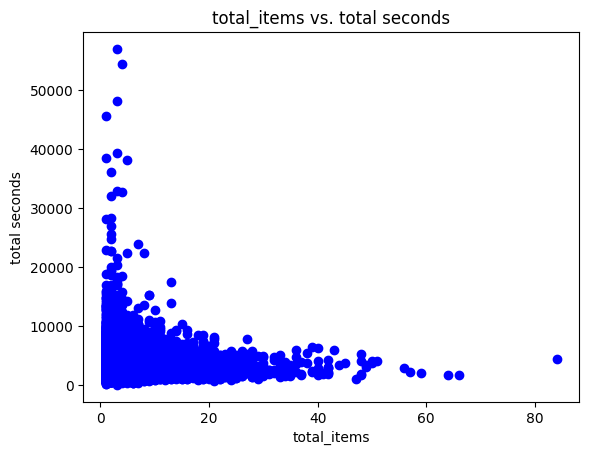

In [ ]:
dataA = data_cleaned2[data_cleaned2['total_seconds']<100000]
dataA = dataA[dataA['total_items']<100]

plt.scatter(dataA['total_items'], dataA['total_seconds'],
            color = 'blue')
plt.xlabel("total_items")
plt.ylabel("total seconds")
plt.title("total_items vs. total seconds")

###subtotal vs. total_seconds###


(0.0, 30000.0)

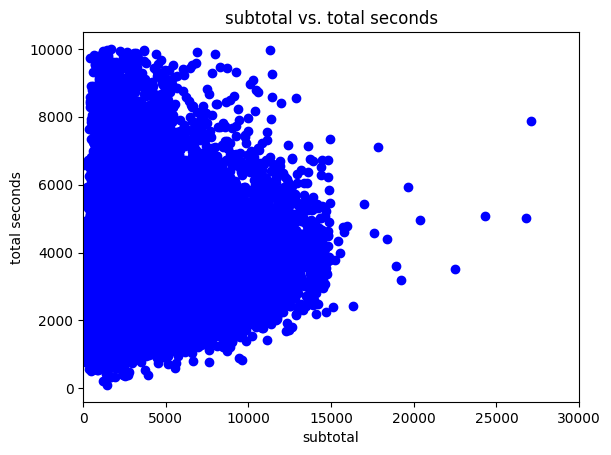

In [ ]:
dataB = data_cleaned2[data_cleaned2['total_seconds']<10000]
plt.scatter(dataB['subtotal'] , dataB['total_seconds'],
            color = 'blue')
plt.xlabel("subtotal")
plt.ylabel("total seconds")
plt.title("subtotal vs. total seconds")
plt.xlim(0,30000)

###num_distinct_items vs. total_seconds###


Text(0.5, 1.0, 'num_distinct_items vs. total seconds')

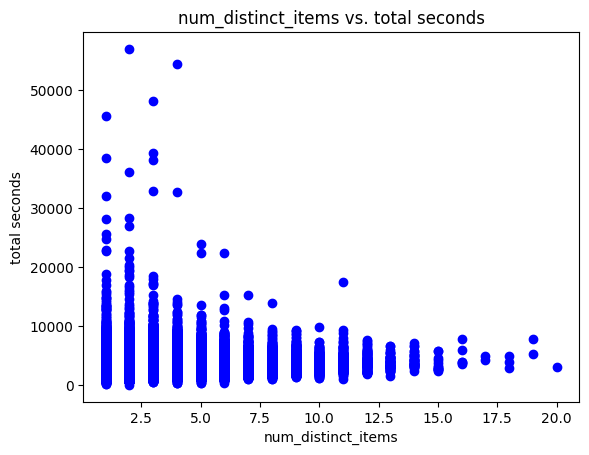

In [ ]:
dataC = data_cleaned2[data_cleaned2['total_seconds']<100000]
plt.scatter(dataC['num_distinct_items'], dataC['total_seconds'],
            color = 'blue')
plt.xlabel("num_distinct_items")
plt.ylabel("total seconds")
plt.title("num_distinct_items vs. total seconds")

###min_item_price vs. total_seconds###


Text(0.5, 1.0, 'min_item_price vs. total seconds')

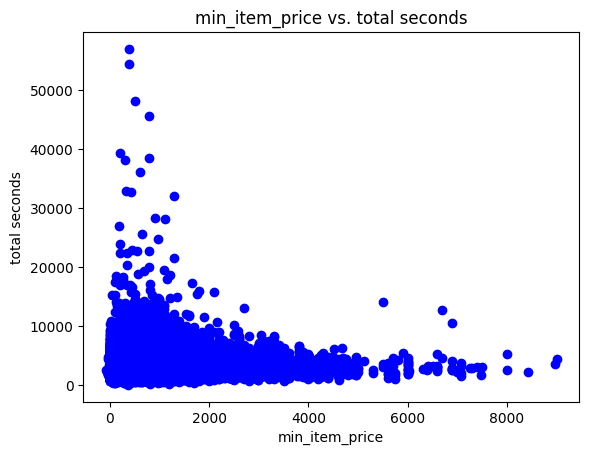

In [ ]:
dataD = data_cleaned2[data_cleaned2['total_seconds']<100000]
dataD = dataD[dataD['min_item_price']<10000]

plt.scatter(dataD['min_item_price'], dataD['total_seconds'],
            color = 'blue')
plt.xlabel("min_item_price")
plt.ylabel("total seconds")
plt.title("min_item_price vs. total seconds")

###max_item_price vs. total_seconds###


Text(0.5, 1.0, 'max_item_price vs. total seconds')

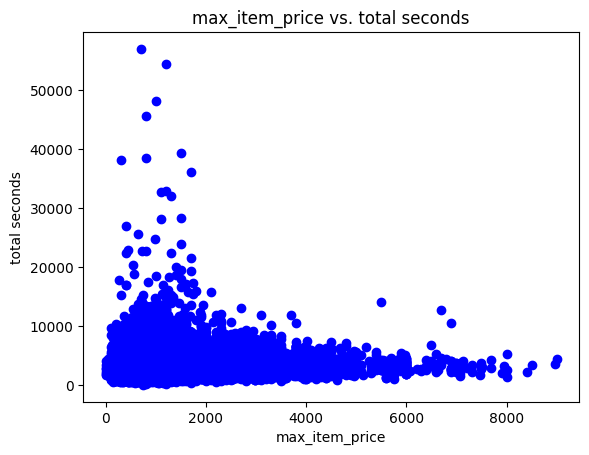

In [ ]:
dataE = data_cleaned2[data_cleaned2['total_seconds']<100000]
dataE = dataE[dataE['max_item_price']<10000]


plt.scatter(dataE['max_item_price'], dataE['total_seconds'],
            color = 'blue')
plt.xlabel("max_item_price")
plt.ylabel("total seconds")
plt.title("max_item_price vs. total seconds")

###total_onshift_dashers vs. total_seconds###


(0.0, 200.0)

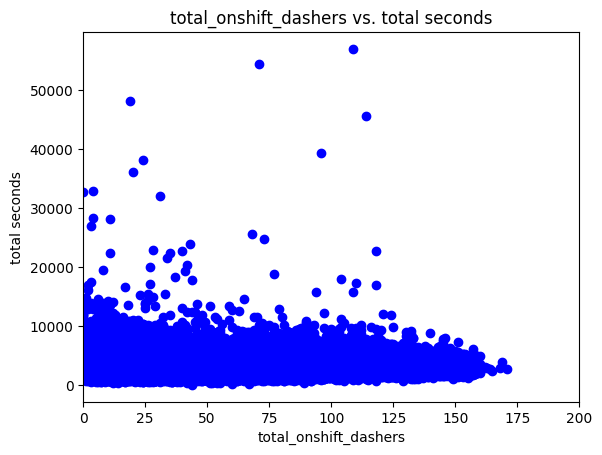

In [ ]:
dataF = data_cleaned2[data_cleaned2['total_seconds']<150000]

plt.scatter(dataF['total_onshift_dashers'], dataF['total_seconds'],
            color = 'blue')
plt.xlabel("total_onshift_dashers")
plt.ylabel("total seconds")
plt.title("total_onshift_dashers vs. total seconds")
plt.xlim(0,200)

###total_busy_dashers vs. total_seconds###


Text(0.5, 1.0, 'total_busy_dashers vs. total seconds')

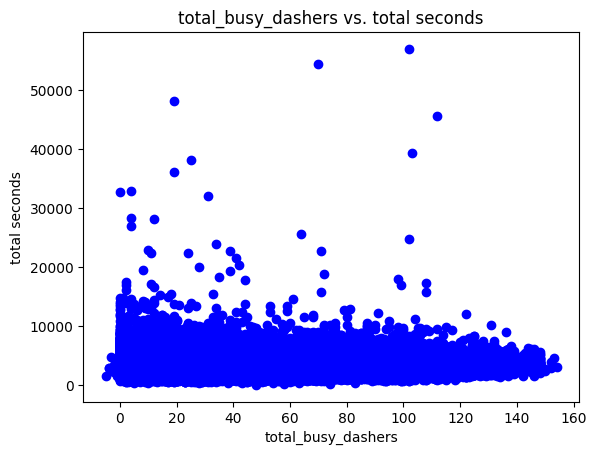

In [ ]:
dataG = data_cleaned2[data_cleaned2['total_seconds']<100000]

plt.scatter(dataG['total_busy_dashers'], dataG['total_seconds'],
            color = 'blue')
plt.xlabel("total_busy_dashers")
plt.ylabel("total seconds")
plt.title("total_busy_dashers vs. total seconds")

###total_outstanding_orders vs. total_seconds###


Text(0.5, 1.0, 'total_outstanding_orders vs. total seconds')

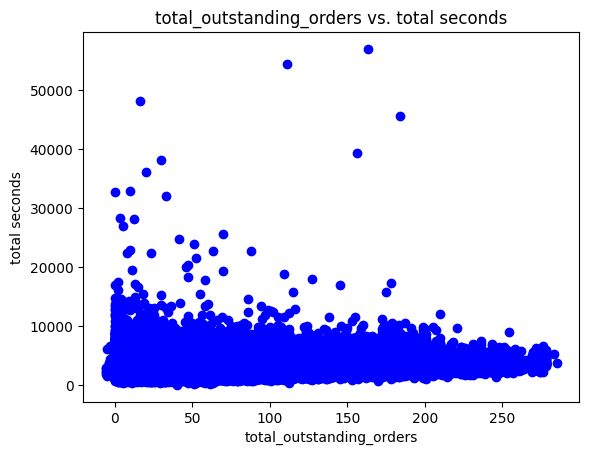

In [ ]:
dataH = data_cleaned2[data_cleaned2['total_seconds']<100000]

plt.scatter(dataH['total_outstanding_orders'], dataH['total_seconds'],
            color = 'blue')
plt.xlabel("total_outstanding_orders")
plt.ylabel("total seconds")
plt.title("total_outstanding_orders vs. total seconds")

###estimated_order_place_duration vs. total_seconds###


Text(0.5, 1.0, 'estimated_order_place_duration vs. total seconds')

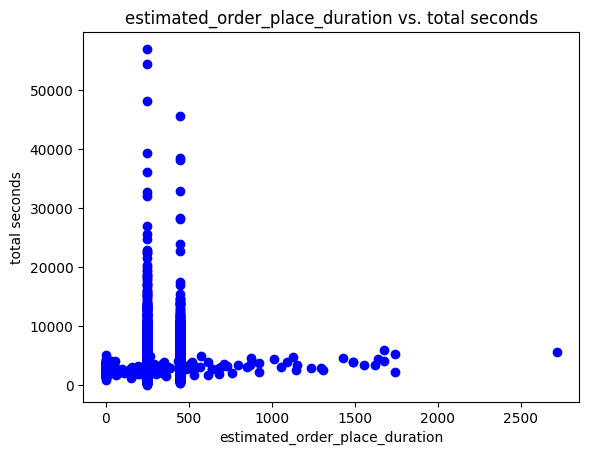

In [ ]:
dataI = data_cleaned2[data_cleaned2['total_seconds']<100000]

plt.scatter(dataI['estimated_order_place_duration'], dataI['total_seconds'],
            color = 'blue')
plt.xlabel("estimated_order_place_duration")
plt.ylabel("total seconds")
plt.title("estimated_order_place_duration vs. total seconds")

###estimated_sore_to_consumer_driving_duration vs. total_seconds###


Text(0.5, 1.0, 'estimated_store_to_consumer_driving_duration vs. total seconds')

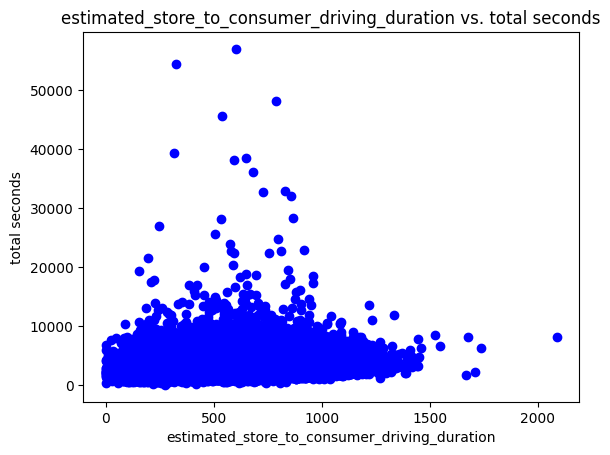

In [ ]:
dataJ = data_cleaned2[data_cleaned2['total_seconds']<150000]

plt.scatter(dataJ['estimated_store_to_consumer_driving_duration'], dataJ['total_seconds'],
            color = 'blue')
plt.xlabel("estimated_store_to_consumer_driving_duration")
plt.ylabel("total seconds")
plt.title("estimated_store_to_consumer_driving_duration vs. total seconds")

###estimated_store_to_consumer_driving_duration vs. total_seconds###


Text(0.5, 1.0, 'estimated_store_to_consumer_driving_duration vs. total seconds')

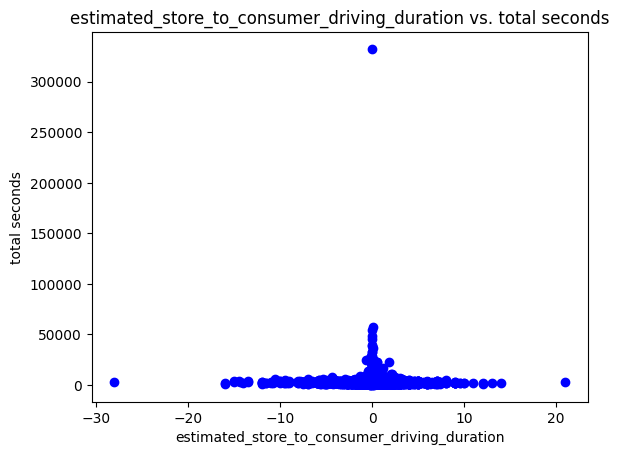

In [ ]:
dataK = (data_cleaned2['total_onshift_dashers']-data_cleaned2['total_busy_dashers'])/data_cleaned2['total_outstanding_orders']
plt.scatter(dataK, data_cleaned2['total_seconds'],
            color = 'blue')
plt.xlabel("estimated_store_to_consumer_driving_duration")
plt.ylabel("total seconds")
plt.title("estimated_store_to_consumer_driving_duration vs. total seconds")

##**Greedy Algorithm For Linear Regression**

In [ ]:
#Greedy Algorithm for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
best_metric = float('inf')
selectedPredictors = []
modelTemp = []
columns = list(xTrain.columns)

print(columns)
for i in range(5):
  best_feature_found = None
  for column in columns:
    if column not in selectedPredictors:
      modelTemp = selectedPredictors + [column]
      model.fit(xTrain[modelTemp], yTrain)
      yPred = model.predict(xTest[modelTemp])
      mse = mean_squared_error(yTest, yPred)

      if mse < best_metric:
        best_metric = mse
        best_feature_found = column
  if best_feature_found != None:
    selectedPredictors.append(best_feature_found)
  else:
    break

print(selectedPredictors)
xTrain[selectedPredictors].head()

['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'hour_of_day', 'weekday']
['estimated_store_to_consumer_driving_duration', 'subtotal', 'total_outstanding_orders', 'total_onshift_dashers', 'hour_of_day']


,estimated_store_to_consumer_driving_duration,subtotal,total_outstanding_orders,total_onshift_dashers,hour_of_day
27671,-0.644282,1.703426,-0.856612,-0.985498,1.544831
119916,-0.346057,-0.791191,-0.169649,0.202457,-0.637914
64261,-0.139594,-0.807807,-1.028353,-1.072421,1.544831
75941,1.346942,0.172537,-0.818448,-0.666778,1.315069
20798,-1.080149,-0.597338,2.635453,1.854004,-0.752796


##**Linear Regression Model**

In [ ]:
# Linear Regression
model.fit(xTrain[selectedPredictors], yTrain)
yPred = model.predict(xTest[selectedPredictors])
mse = mean_squared_error(yTest, yPred)
print(mse)

0.746911066542064


##**Decision Tree Model**

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
decisionTree = DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 100, random_state=42) # need to figure out best max tree depth, should depend on predictors (can also specific other parameters)

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

decisionTree.fit(xTrain, yTrain) #xTrain: array of predictors; yTrain: vector of response variable
preds = decisionTree.predict(xTest)

# kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
# cvScore = model_selection.cross_val_score(decisionTree, xTrain, yTrain, cv=kfold)
# print(cvScore)

mse = mean_squared_error(yTest, preds)
print(mse)
# avgCVScore = cvScore.mean()
# print(avgCVScore)
# make decision tree forest?


0.742865844662372


##**Logistic Regression Model**
(Does not work for our dataset)

In [ ]:
# Logistic Regression

##I don't think this can be used because our output is not categorical
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression()
logRegModel.fit(xTrain[selectedPredictors], yTrain)
logRegPred = logRegModel.predict(xTest)
logRegKFold = KFold(n_splits = 10, random_state = 5, shuffle = True)
logRegKFoldScore = model_selection.cross_val_score(logRegModel, xTrain[selectedPredictors], yTrain, cv = 5)
print(f"Logistic Regression mean kfold score: {logRegKFoldScore.mean()}")

##**Neural Network Model**

In [ ]:
#Neural Network Code
from sklearn.neural_network import MLPRegressor

NNmodel = MLPRegressor(hidden_layer_sizes=(64,32,16), activation='relu', max_iter=200, random_state=8)

NNmodel.fit(xTrain, yTrain)

y_pred = NNmodel.predict(xTest)

mse = mean_squared_error(yTest, y_pred)

print(mse)

0.6708489608643885


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
